In [53]:
import pandas as pd
from rctgan import Metadata
from rctgan.relational import RCTGAN
import pickle


In [54]:
# Load your datasets
df_customers_info = pd.read_csv('../Datasets/Finance/customers_info.csv')
df_transactions = pd.read_csv('../Datasets/Finance/transactions.csv')
df_credit_cards = pd.read_csv('../Datasets/Finance/credit_cards.csv')
df_customer_demographics = pd.read_csv('../Datasets/Finance/customer_demographics.csv')

In [82]:
df_customers_info

,customer_id,first_name,last_name,email,phone_number,address,account_status
0,1,Arthur,Sloan,desiree67@vargas-nelson.com,678.605.7437,"Unit 7298 Box 9041, DPO AA 88125",Active
1,2,Christopher,Schultz,amanda90@hotmail.com,066-950-6331x388,"357 Amy Mountains, West Ashleyfort, NJ 28182",Closed
2,3,Jared,Robinson,millercatherine@hotmail.com,818-070-3092,"42776 Daniel Stream, Brownberg, MA 53174",Inactive
3,4,Kim,Peterson,gdavis@yahoo.com,289.981.4977x7959,"1542 Fowler Lodge, Franciscofort, OR 73055",Active
4,5,Sherry,Sullivan,kjackson@palmer-david.biz,5247897561,"PSC 2148, Box 7515, APO AP 42879",Active
...,...,...,...,...,...,...,...
95,96,Joshua,Nelson,jackpotter@woods.com,298.193.8792x265,"4871 Cuevas Square Suite 882, North Kimfurt, M...",Active
96,97,Emily,Jones,randy48@hotmail.com,244-842-4200,"508 Travis Lights Apt. 119, North Phillipbury,...",Active
97,98,Timothy,Mckenzie,piercedavid@gmail.com,081-888-7270x81579,"638 Sara Ridges Apt. 844, West Markshire, IL 6...",Active
98,99,Susan,Martin,darlene25@gmail.com,363-895-7333x77314,"597 Renee Valleys, New Brookefurt, AZ 93732",Active


In [83]:
df_transactions

,transaction_id,customer_id,card_id,amount,merchant,transaction_type
0,1,84,96,"2,997.1500",Fuller-Fowler,ATM Withdrawal
1,2,89,67,"4,134.8600",Trujillo-Owens,Bill Payment
2,3,86,27,"4,795.5800","Blackwell, Townsend and Tran",ATM Withdrawal
3,4,13,93,"1,715.9100",Bush-Hopkins,In-Store
4,5,59,32,"1,140.6200","Brady, Sullivan and Berry",Bill Payment
...,...,...,...,...,...,...
295,296,4,95,626.5700,"Mccormick, Collins and Ware",Bill Payment
296,297,4,36,"4,782.3000",Thompson-Mcneil,In-Store
297,298,56,36,"3,990.9600","Choi, Knox and Graves",ATM Withdrawal
298,299,25,26,"1,298.6200",Roman-Webb,In-Store


In [84]:
df_credit_cards

,card_id,customer_id,card_number,card_type,credit_limit,cvv,card_status
0,1,63,377583173047655,Amex,14446,989,Active
1,2,96,3564471652214318,Discover,2218,541,Active
2,3,52,3543229066971089,Discover,5735,183,Active
3,4,96,30053698206409,Amex,12296,640,Expired
4,5,4,340550110331298,Discover,5555,623,Active
...,...,...,...,...,...,...,...
95,96,73,4050387935826281,Visa,4051,245,Active
96,97,59,4938077676980342,Discover,16979,588,Active
97,98,70,6011426249903155,Discover,17388,716,Active
98,99,80,60439511936,Discover,1876,956,Active


In [85]:
df_customer_demographics

,customer_id,gender,marital_status,income_range,education_level,employment_status,home_ownership
0,1,Male,Single,25K-50K,High School,Employed,Own
1,2,Female,Widowed,100K+,PhD,Unemployed,Mortgage
2,3,Female,Widowed,<25K,High School,Employed,Own
3,4,Female,Single,50K-100K,Master,Retired,Mortgage
4,5,Male,Divorced,50K-100K,Associate,Employed,Mortgage
...,...,...,...,...,...,...,...
95,96,Male,Married,100K+,Associate,Employed,Mortgage
96,97,Male,Single,25K-50K,High School,Employed,Own
97,98,Male,Divorced,100K+,PhD,Employed,Rent
98,99,Male,Single,25K-50K,Associate,Employed,Own


## Removing Date col

In [55]:
df_customers_info.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'phone_number',
       'address', 'date_of_birth', 'account_open_date', 'account_status'],
      dtype='object')

In [56]:
df_customers_info = df_customers_info[['customer_id', 'first_name', 'last_name', 'email', 'phone_number',
       'address', 'account_status']]

In [57]:
df_transactions.columns

Index(['transaction_id', 'customer_id', 'card_id', 'transaction_date',
       'amount', 'merchant', 'transaction_type'],
      dtype='object')

In [58]:
df_transactions = df_transactions[['transaction_id', 'customer_id', 'card_id',
       'amount', 'merchant', 'transaction_type']]

In [59]:
df_credit_cards.columns

Index(['card_id', 'customer_id', 'card_number', 'card_type', 'credit_limit',
       'expiration_date', 'cvv', 'card_status'],
      dtype='object')

In [60]:
df_credit_cards = df_credit_cards[['card_id', 'customer_id', 'card_number', 'card_type', 'credit_limit',
       'cvv', 'card_status']]

In [61]:
df_customer_demographics.columns

Index(['customer_id', 'gender', 'marital_status', 'income_range',
       'education_level', 'employment_status', 'home_ownership'],
      dtype='object')

In [62]:
df_customer_demographics = df_customer_demographics[['customer_id', 'gender', 'marital_status', 'income_range',
       'education_level', 'employment_status', 'home_ownership']]

## Creating the tables dict

In [63]:
# Dictionary to hold dataframes
tables = {
    "customers_info": df_customers_info,
    "transactions": df_transactions,
    "credit_cards": df_credit_cards,
    "customer_demographics": df_customer_demographics
}

## Creating metadata

In [64]:
# Initialize Metadata instance
metadata = Metadata()

# Define field properties for each table
customers_info_fields = {
    "customer_id": {"type": "id", "subtype": "string"},
    "first_name": {"type": "categorical"},
    "last_name": {"type": "categorical"},
    "email": {"type": "categorical"},
    "phone_number": {"type": "categorical"},
    "address": {"type": "categorical"},
    # "date_of_birth": {"type": "datetime"},
    # "account_open_date": {"type": "datetime"},
    "account_status": {"type": "categorical"}
}

transactions_fields = {
    "transaction_id": {"type": "id", "subtype": "string"},
    "customer_id": {"type": "id", "subtype": "string"},
    "card_id": {"type": "id", "subtype": "string"},
    # "transaction_date": {"type": "datetime"},
    "amount": {"type": "numerical", "subtype": "float"},
    "merchant": {"type": "categorical"},
    "transaction_type": {"type": "categorical"}
}

credit_cards_fields = {
    "card_id": {"type": "id", "subtype": "string"},
    "customer_id": {"type": "id", "subtype": "string"},
    "card_number": {"type": "categorical"},
    "card_type": {"type": "categorical"},
    "credit_limit": {"type": "numerical", "subtype": "float"},
    # "expiration_date": {"type": "datetime"},
    "cvv": {"type": "categorical"},
    "card_status": {"type": "categorical"}
}

customer_demographics_fields = {
    "customer_id": {"type": "id", "subtype": "string"},
    "gender": {"type": "categorical"},
    "marital_status": {"type": "categorical"},
    "income_range": {"type": "categorical"},
    "education_level": {"type": "categorical"},
    "employment_status": {"type": "categorical"},
    "home_ownership": {"type": "categorical"}
}

# Add tables with primary keys
metadata.add_table(
    name="customers_info",
    data=tables["customers_info"],
    primary_key="customer_id",
    fields_metadata=customers_info_fields
)

metadata.add_table(
    name="transactions",
    data=tables["transactions"],
    primary_key="transaction_id",
    fields_metadata=transactions_fields
)

metadata.add_table(
    name="credit_cards",
    data=tables["credit_cards"],
    primary_key="card_id",
    fields_metadata=credit_cards_fields
)

metadata.add_table(
    name="customer_demographics",
    data=tables["customer_demographics"],
    primary_key="customer_id",
    fields_metadata=customer_demographics_fields
)

# Add relationships (Foreign Key mappings)
metadata.add_relationship(parent="customers_info", child="transactions", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="credit_cards", foreign_key="customer_id")
metadata.add_relationship(parent="customers_info", child="customer_demographics", foreign_key="customer_id")
metadata.add_relationship(parent="credit_cards", child="transactions", foreign_key="card_id")

# Print metadata to verify
import json
print(json.dumps(metadata.to_dict(), indent=4))

{
    "tables": {
        "customers_info": {
            "fields": {
                "customer_id": {
                    "type": "id",
                    "subtype": "string"
                },
                "first_name": {
                    "type": "categorical"
                },
                "last_name": {
                    "type": "categorical"
                },
                "email": {
                    "type": "categorical"
                },
                "phone_number": {
                    "type": "categorical"
                },
                "address": {
                    "type": "categorical"
                },
                "account_status": {
                    "type": "categorical"
                }
            },
            "primary_key": "customer_id"
        },
        "transactions": {
            "fields": {
                "transaction_id": {
                    "type": "id",
                    "subtype": "string"
                },
    

## Training the model

In [65]:
# model = RCTGAN(metadata)
# model.fit(tables)

## Saving the model

In [66]:
# pickle.dump(model, open('../Models/model_rctgan.p', "wb" ) )

## Loading the model

In [67]:
# model = pickle.load(open("../Models/model_rctgan.p", "rb" ) )

## Tuning the model

In [68]:
hyper = {
    'customers_info': {
        'embedding_dim': 64,
        'generator_lr': 2e-5,
        'generator_dim': (256, 256)
    },
    'transactions': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (128, 128),
        'batch_size': 10000
    },
    'credit_cards': {
        'embedding_dim': 12,
        'generator_lr': 2e-4,
        'generator_dim': (64, 64),
        'batch_size': 10000,
        'grand_parent': True
    },
    'customer_demographics': {
        'embedding_dim': 16,
        'generator_lr': 3e-4,
        'generator_dim': (128, 128),
        'batch_size': 8000
    }
}

# Initialize and train the RCTGAN model
model = RCTGAN(metadata, hyper)
model.fit(tables)

/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[columns] = columns_data
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/base.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the re

In [69]:
pickle.dump(model, open('../Models/model_rctgan_tuned.p', "wb" ) )

## Generating the samples

In [70]:
synthetic_data = model.sample()

/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/ctganpc/synthesizers/ctganpc.py:994: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_gobal = data_gobal.append(data)
/Users/apple/Documents/Priyesh/Repositories/2025/SynthGen/RCTGAN/rctgan/rdt2/transformers/categorical.py:181: UserWarning: The data contains 33 new categories that were not seen in the original data (examples: {1977600226508861696, 144638776941140480, 129719995857624960, 177677417861059520, 37770658572309176}). Assigning them random values. If you want to model new categories, please fit the transformer again with the new data.
  warn

In [71]:
synthetic_data.keys()

dict_keys(['customers_info', 'customer_demographics', 'credit_cards', 'transactions'])

In [72]:
df_customers_info

,customer_id,first_name,last_name,email,phone_number,address,account_status
0,1,Arthur,Sloan,desiree67@vargas-nelson.com,678.605.7437,"Unit 7298 Box 9041, DPO AA 88125",Active
1,2,Christopher,Schultz,amanda90@hotmail.com,066-950-6331x388,"357 Amy Mountains, West Ashleyfort, NJ 28182",Closed
2,3,Jared,Robinson,millercatherine@hotmail.com,818-070-3092,"42776 Daniel Stream, Brownberg, MA 53174",Inactive
3,4,Kim,Peterson,gdavis@yahoo.com,289.981.4977x7959,"1542 Fowler Lodge, Franciscofort, OR 73055",Active
4,5,Sherry,Sullivan,kjackson@palmer-david.biz,5247897561,"PSC 2148, Box 7515, APO AP 42879",Active
...,...,...,...,...,...,...,...
95,96,Joshua,Nelson,jackpotter@woods.com,298.193.8792x265,"4871 Cuevas Square Suite 882, North Kimfurt, M...",Active
96,97,Emily,Jones,randy48@hotmail.com,244-842-4200,"508 Travis Lights Apt. 119, North Phillipbury,...",Active
97,98,Timothy,Mckenzie,piercedavid@gmail.com,081-888-7270x81579,"638 Sara Ridges Apt. 844, West Markshire, IL 6...",Active
98,99,Susan,Martin,darlene25@gmail.com,363-895-7333x77314,"597 Renee Valleys, New Brookefurt, AZ 93732",Active


In [73]:
synthetic_data['customers_info']

,customer_id,first_name,last_name,email,phone_number,address,account_status
0,0,Kristine,Downs,sarahenry@edwards.com,(336)353-7565x5522,"39424 Matthew Via, New Katherine, CT 07058",Active
1,1,Monique,Contreras,ymoore@yahoo.com,001-057-256-2035x15143,"64431 Williams Terrace Suite 643, Harrisland, ...",Active
2,2,Jacob,Sandoval,dianafry@hotmail.com,(336)353-7565x5522,"PSC 1220, Box 4227, APO AE 15003",Active
3,3,Gregory,Lopez,huntderrick@gmail.com,+1-685-200-4899x80919,"361 Hamilton Landing, New Bernard, GA 96263",Active
4,4,Timothy,Lang,solomonamanda@adams.com,+1-582-751-9174x8803,"07973 Kimberly Avenue Apt. 811, Lake Crystalbe...",Closed
...,...,...,...,...,...,...,...
95,95,Jared,Nelson,owenslaura@sanchez-owens.com,001-213-291-4379x38415,"61310 Darryl Isle, Matthewchester, DE 27250",Active
96,96,Jessica,Nelson,whamilton@ramirez-smith.net,978-447-2607x9632,"36178 Joe Square Suite 921, South Christopherp...",Active
97,97,Jennifer,Nelson,piercedavid@gmail.com,289.981.4977x7959,"94945 Steven Rapid, New Amy, IN 84803",Active
98,98,Kim,Rowe,morrisonbenjamin@hotmail.com,921-585-9087x676,"40481 Anne Hill, West Brittany, IL 30238",Active


In [74]:
df_transactions

,transaction_id,customer_id,card_id,amount,merchant,transaction_type
0,1,84,96,"2,997.1500",Fuller-Fowler,ATM Withdrawal
1,2,89,67,"4,134.8600",Trujillo-Owens,Bill Payment
2,3,86,27,"4,795.5800","Blackwell, Townsend and Tran",ATM Withdrawal
3,4,13,93,"1,715.9100",Bush-Hopkins,In-Store
4,5,59,32,"1,140.6200","Brady, Sullivan and Berry",Bill Payment
...,...,...,...,...,...,...
295,296,4,95,626.5700,"Mccormick, Collins and Ware",Bill Payment
296,297,4,36,"4,782.3000",Thompson-Mcneil,In-Store
297,298,56,36,"3,990.9600","Choi, Knox and Graves",ATM Withdrawal
298,299,25,26,"1,298.6200",Roman-Webb,In-Store


In [86]:
df_transactions[df_transactions['merchant'] == 'Miller, Brandt and Torres']

,transaction_id,customer_id,card_id,amount,merchant,transaction_type
80,81,90,84,"2,674.6100","Miller, Brandt and Torres",In-Store


In [87]:
transaction_syn = synthetic_data['transactions']
transaction_syn

,amount,merchant,transaction_type,customer_id,card_id,transaction_id
0,"2,173.4700","Miller, Brandt and Torres",In-Store,0,ce,a
1,"4,315.1800","Henry, Conrad and Bridges",In-Store,0,br,b
2,"2,784.8400",Delgado and Sons,ATM Withdrawal,1,bx,c
3,"2,028.9600",Williams Group,Online,2,bv,d
4,"2,582.3900",Wang and Sons,In-Store,2,bm,e
...,...,...,...,...,...,...
264,"4,286.1100",Miller-Park,Bill Payment,97,b,je
265,"4,292.6500","Flores, Reyes and Reed",ATM Withdrawal,97,by,jf
266,"2,394.9700",Gibson and Sons,ATM Withdrawal,98,j,jg
267,"1,734.9800",Allen and Sons,Bill Payment,98,b,jh


In [88]:
transaction_syn[transaction_syn['merchant'] == 'Miller, Brandt and Torres']

,amount,merchant,transaction_type,customer_id,card_id,transaction_id
0,"2,173.4700","Miller, Brandt and Torres",In-Store,0,ce,a
187,"1,554.9200","Miller, Brandt and Torres",In-Store,72,a,gf


In [76]:
df_credit_cards

,card_id,customer_id,card_number,card_type,credit_limit,cvv,card_status
0,1,63,377583173047655,Amex,14446,989,Active
1,2,96,3564471652214318,Discover,2218,541,Active
2,3,52,3543229066971089,Discover,5735,183,Active
3,4,96,30053698206409,Amex,12296,640,Expired
4,5,4,340550110331298,Discover,5555,623,Active
...,...,...,...,...,...,...,...
95,96,73,4050387935826281,Visa,4051,245,Active
96,97,59,4938077676980342,Discover,16979,588,Active
97,98,70,6011426249903155,Discover,17388,716,Active
98,99,80,60439511936,Discover,1876,956,Active


In [77]:
synthetic_data['credit_cards']

,card_number,card_type,credit_limit,cvv,card_status,customer_id,card_id
0,1977600226508861696,Discover,8028,678,Expired,1,a
1,60439511936,Discover,9774,777,Active,2,b
2,60439511936,Discover,6175,672,Blocked,2,c
3,60439511936,Amex,16519,775,Expired,2,d
4,60439511936,MasterCard,19711,996,Active,2,e
...,...,...,...,...,...,...,...
84,66995517651341736,Discover,5504,387,Active,93,cg
85,13442281854854108,Discover,9144,766,Expired,95,ch
86,282561708268800352,Amex,10471,975,Active,96,ci
87,60439511936,Discover,18937,996,Active,99,cj


## Evaluating data quality

In [78]:
from table_evaluator import TableEvaluator

In [79]:
# Step 5: Define Evaluation Function
def evaluate_synthetic_data(real_data, synthetic_data, metadata, dataset_name="Dataset"):
    print(f"\n--- Evaluating {dataset_name} ---")
    
    # TableEvaluator - Visual Evaluation
    print("\nTableEvaluator Results:")
    evaluator = TableEvaluator(real_data, synthetic_data)
    evaluator.visual_evaluation()
    evaluator.evaluate(target_col=real_data.columns[1])  # Adjust target column

In [80]:
tables.keys()

dict_keys(['customers_info', 'transactions', 'credit_cards', 'customer_demographics'])


--- Evaluating customers_info ---

TableEvaluator Results:


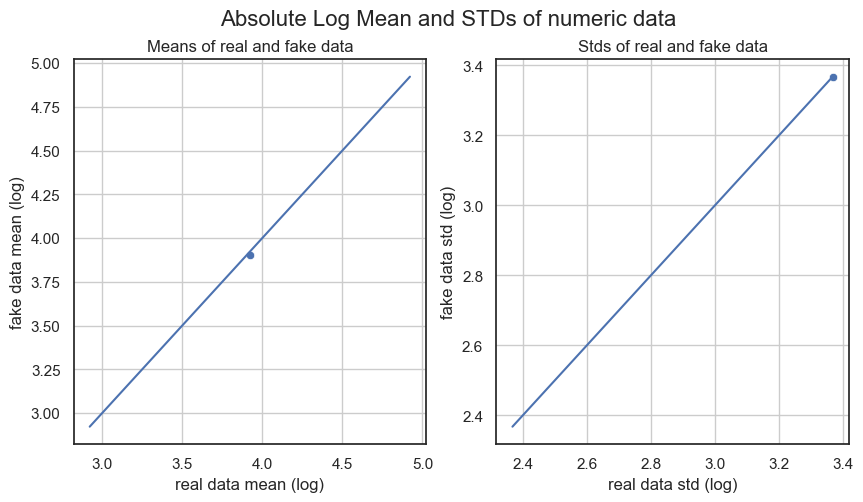

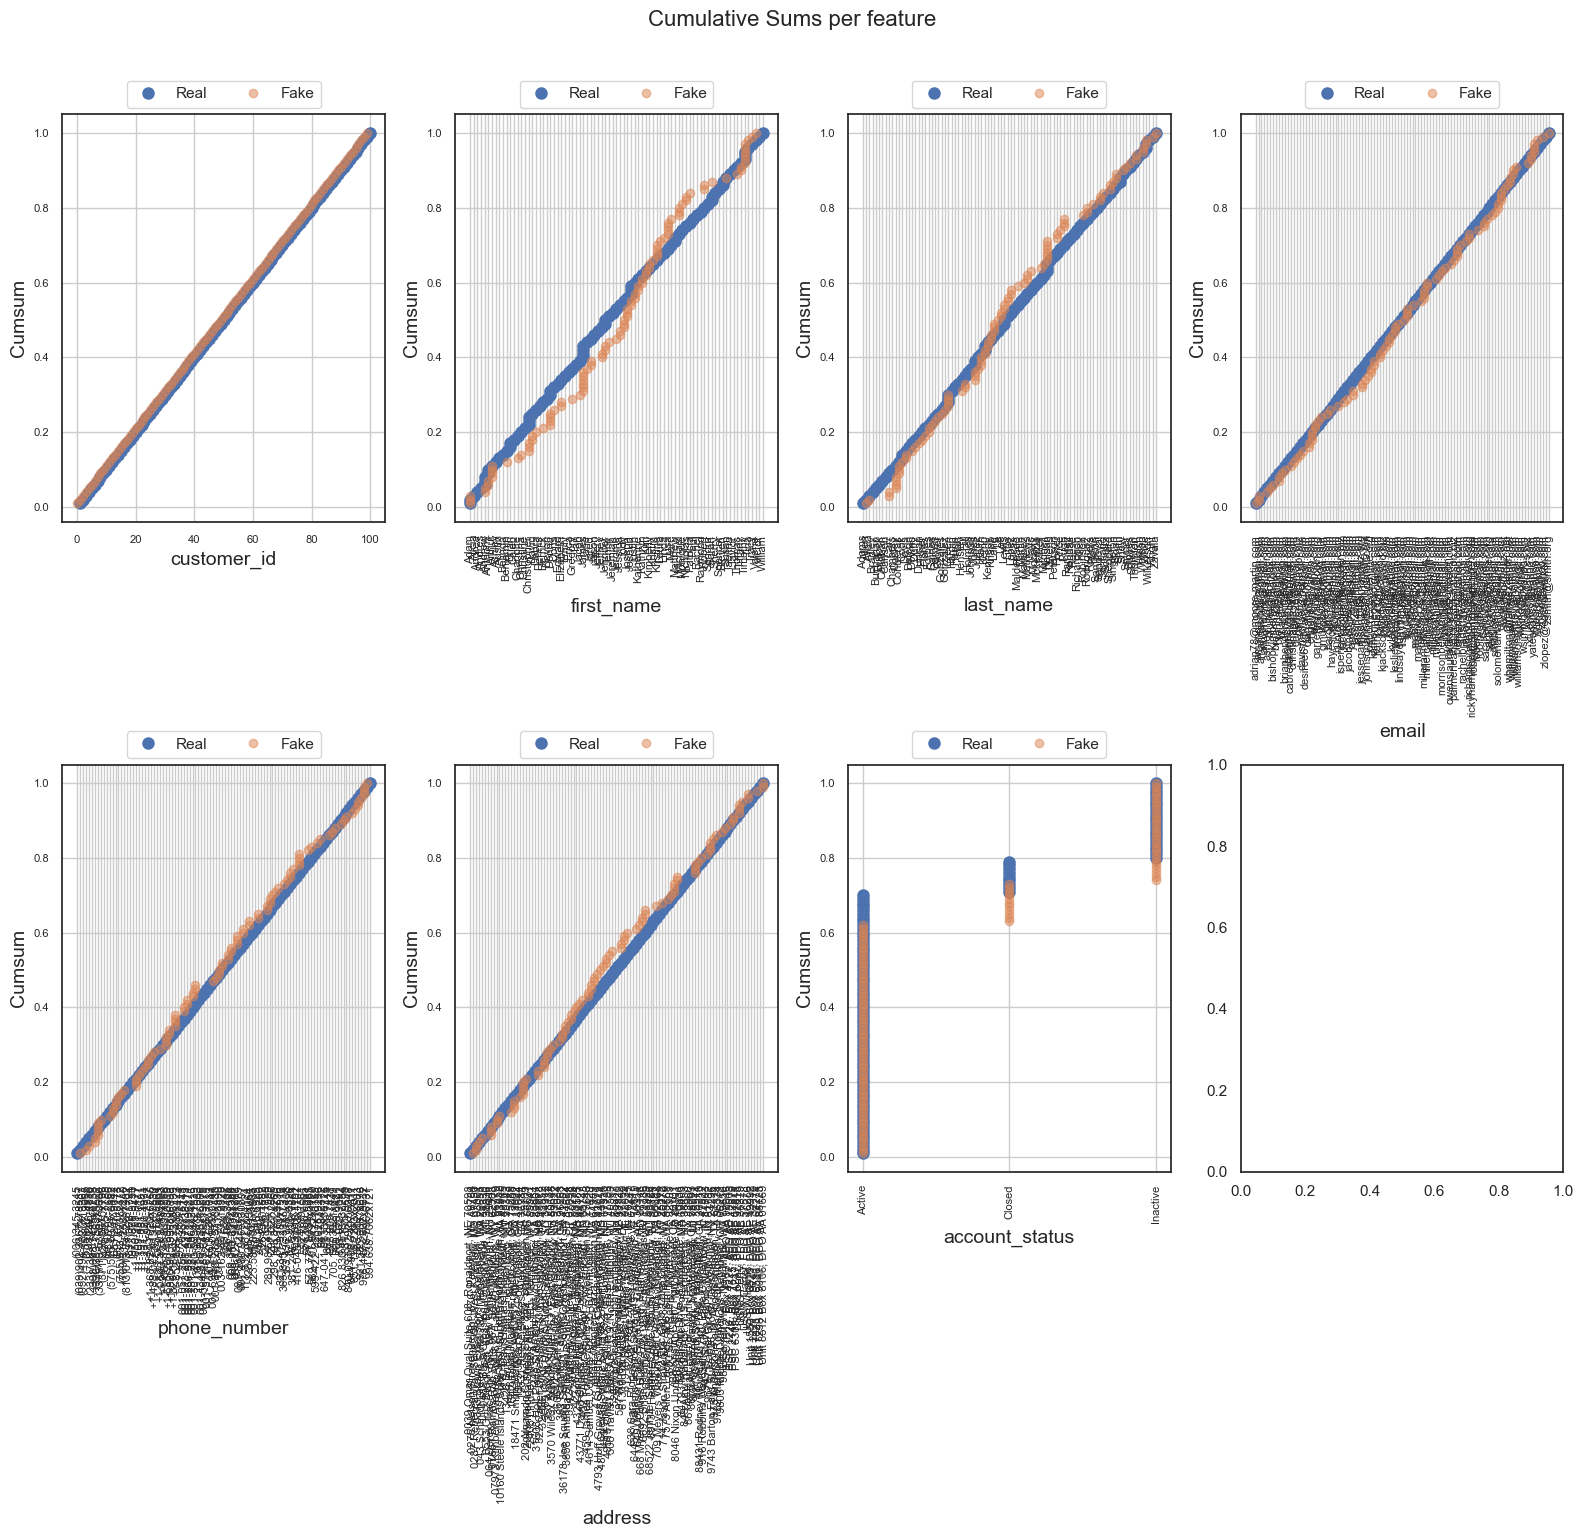

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEn

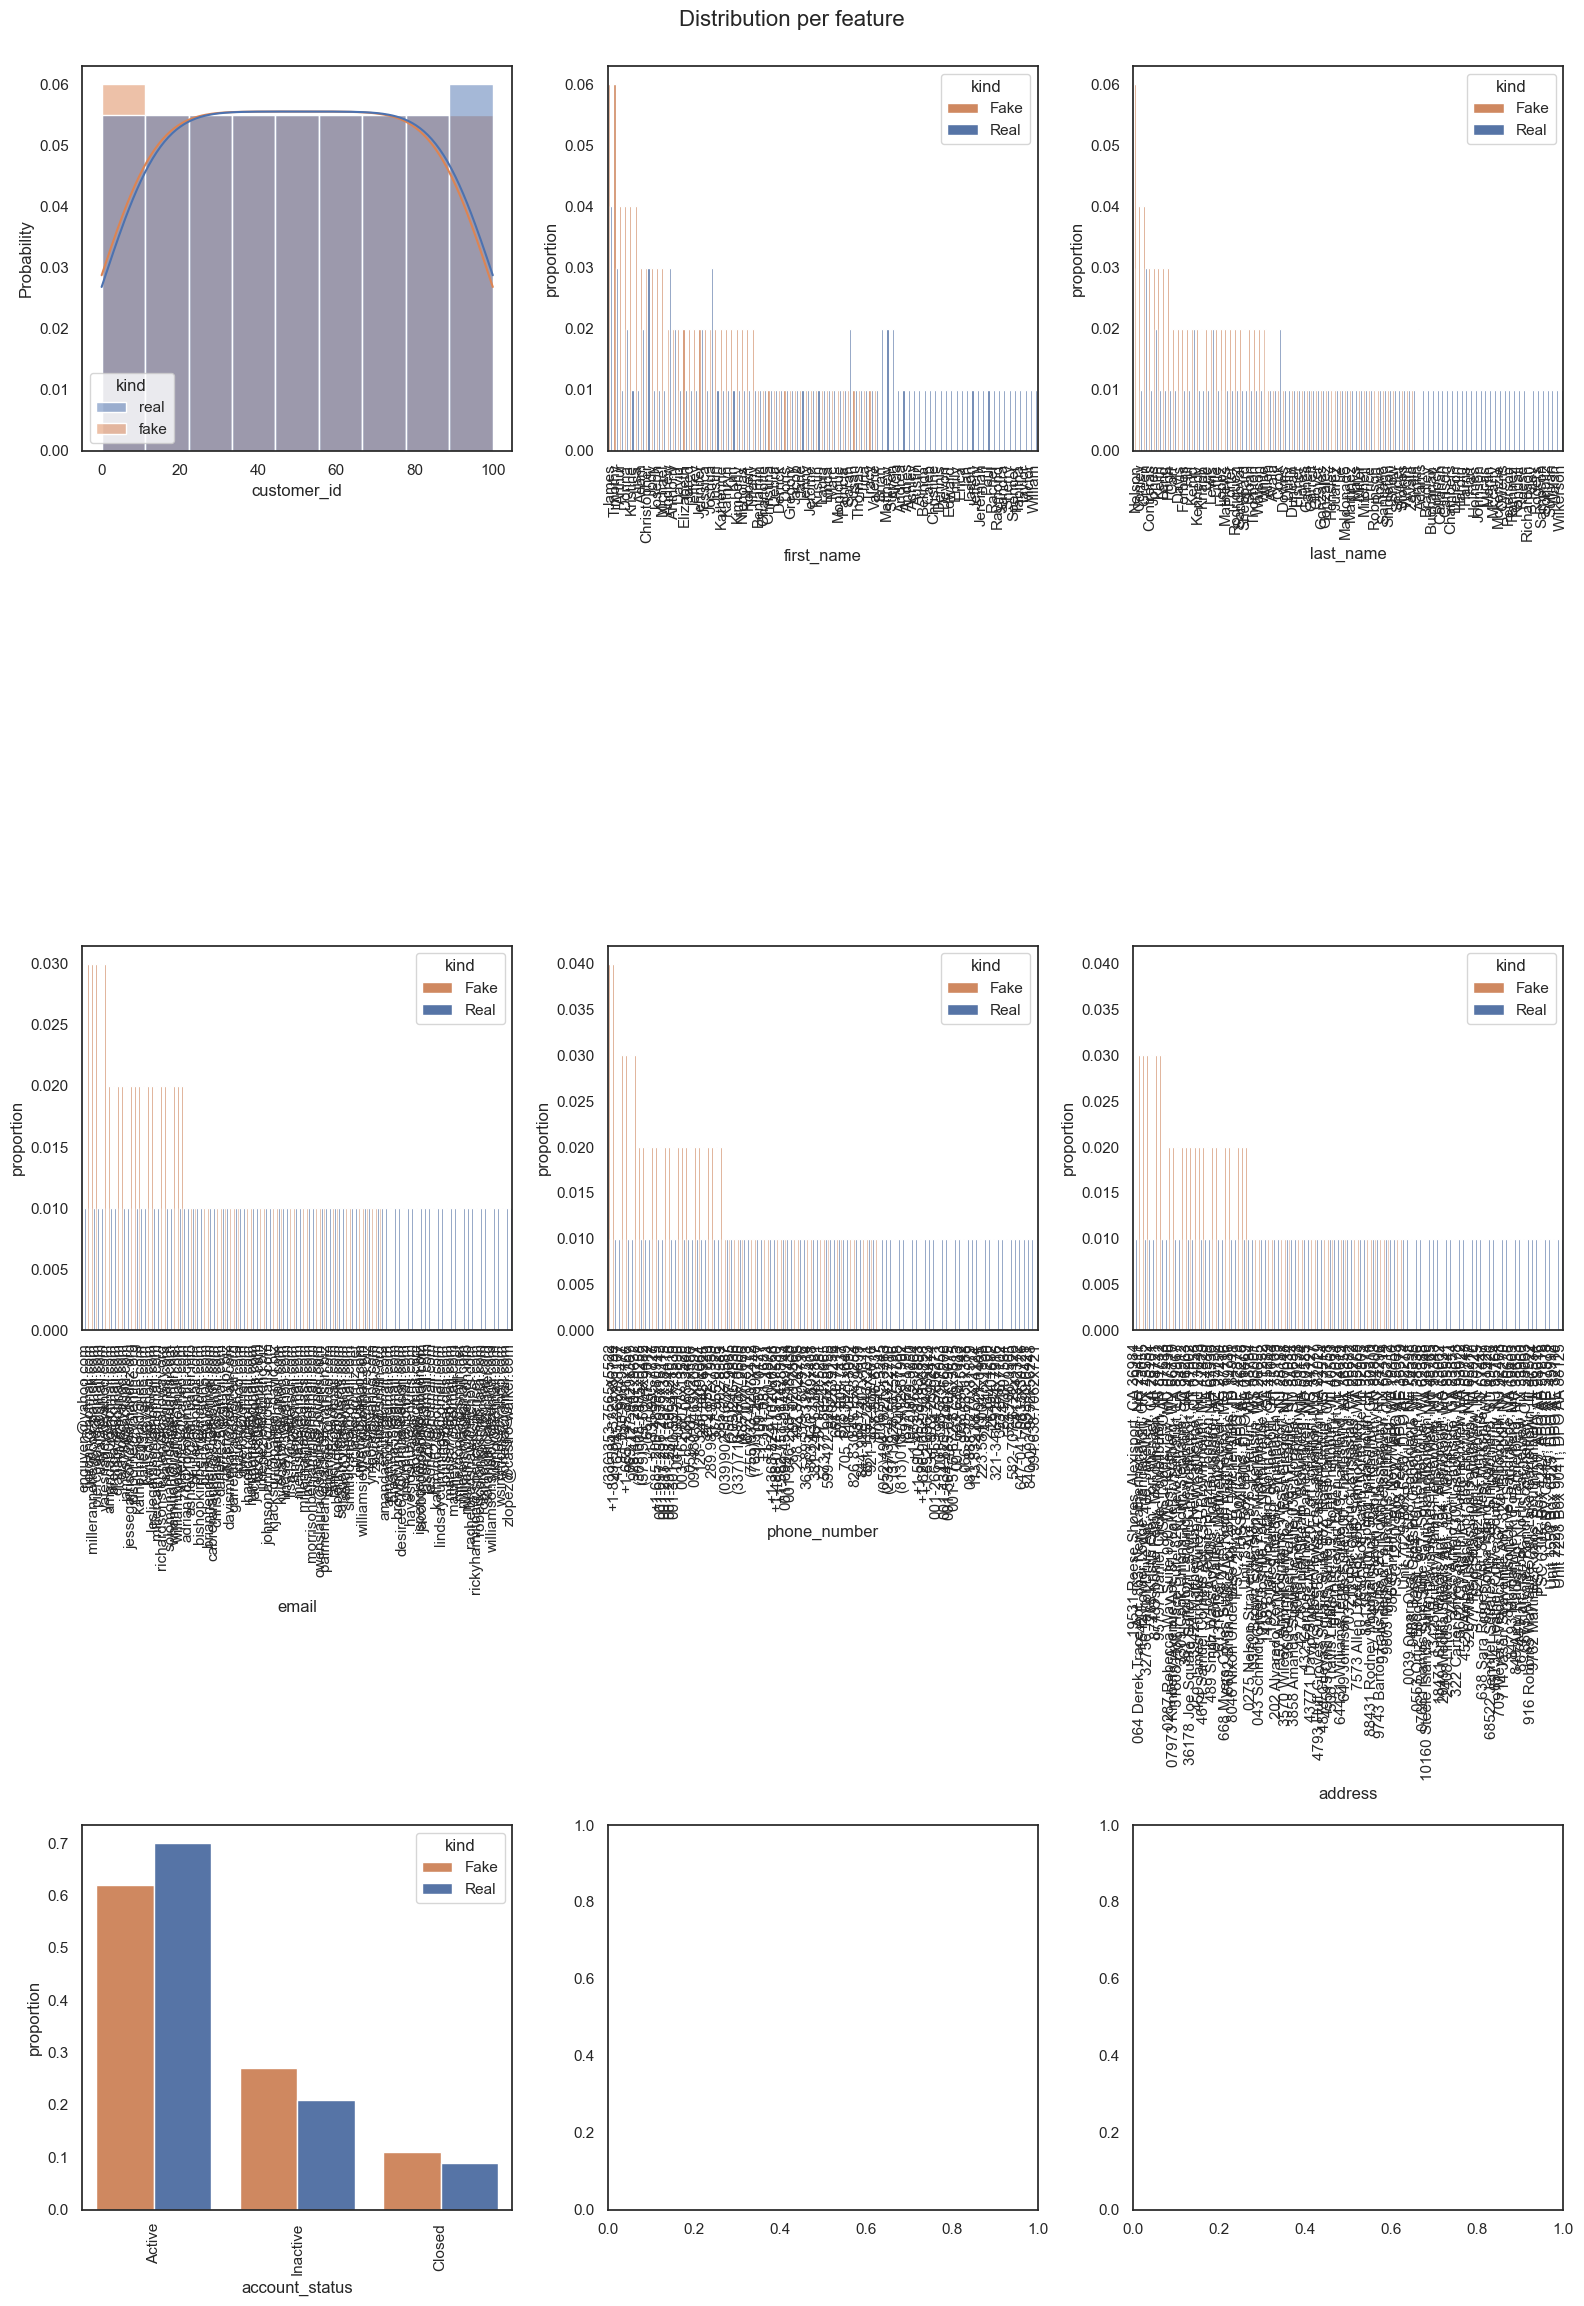

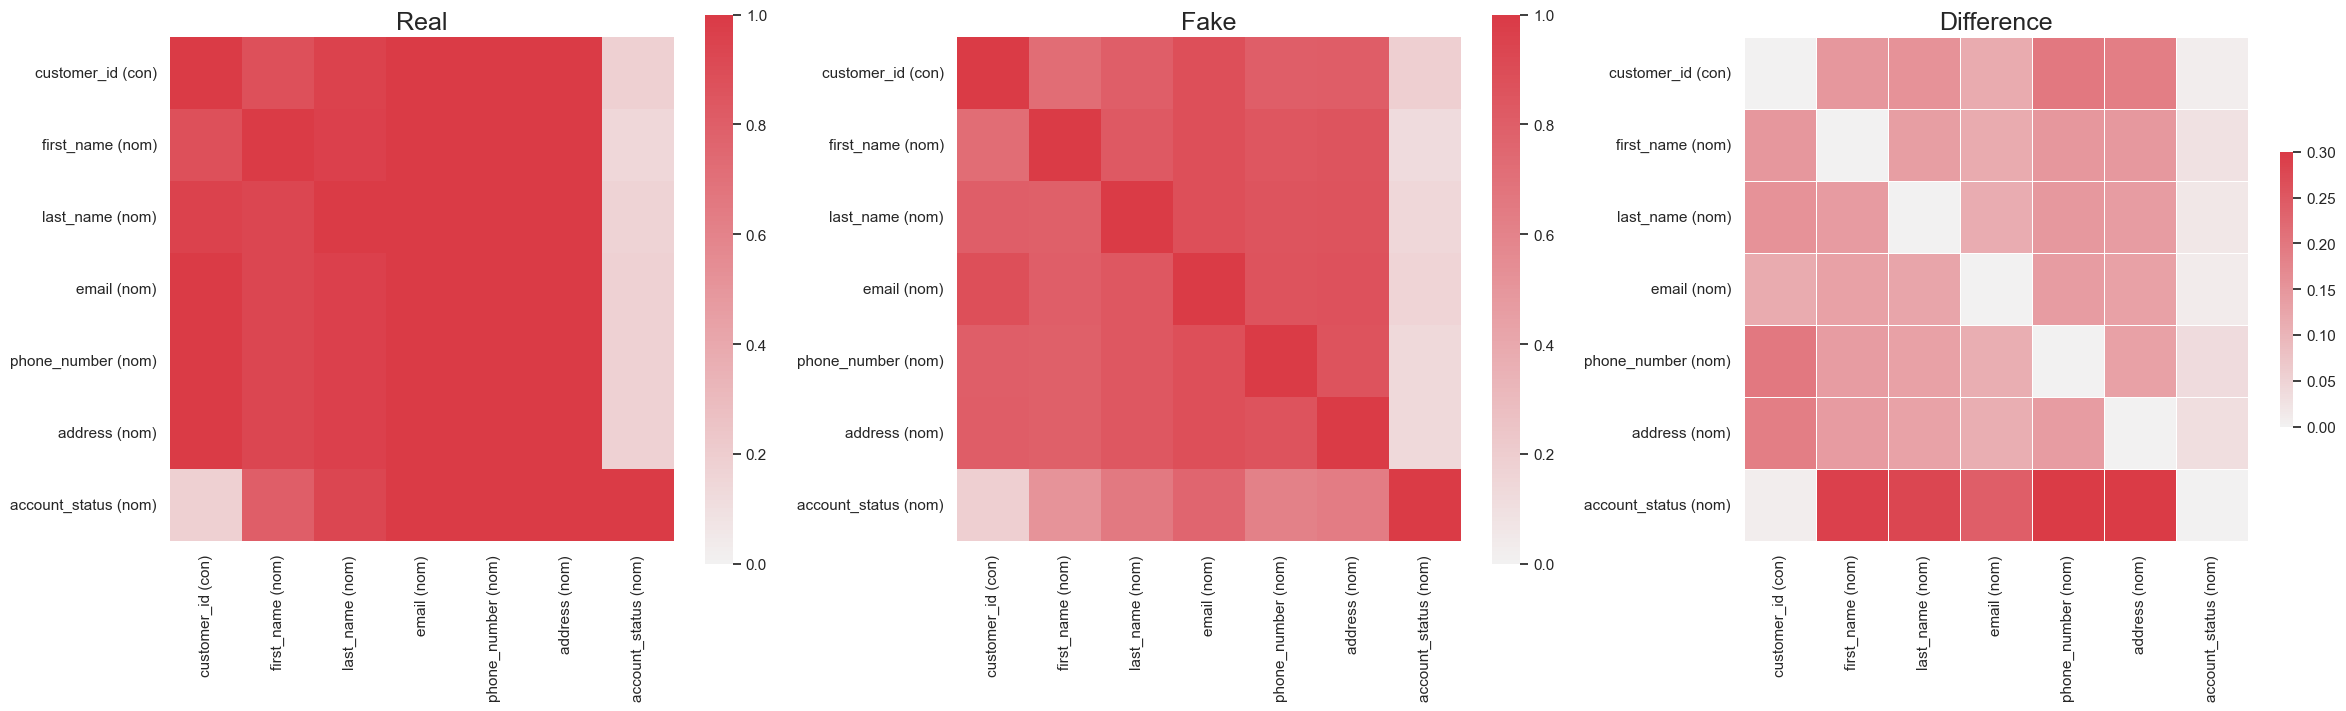

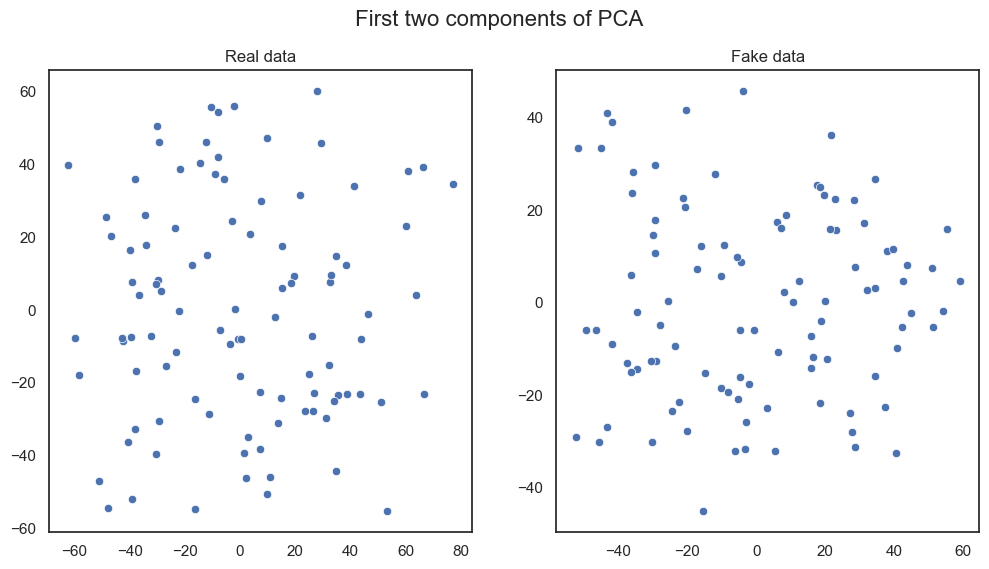

/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/table_evaluator/metrics.py:44: RuntimeWar

IPython not installed.


/Users/apple/Documents/Priyesh/VirtualEnvs/rctgan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


IPython not installed.

Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0500   0.0000              0.0000
DecisionTreeClassifier_real   0.0000   0.0500              0.0000
LogisticRegression_fake       0.0000   0.0000              0.0000
LogisticRegression_real       0.0000   0.0000              0.0256
MLPClassifier_fake            0.0500   0.0000              0.0000
MLPClassifier_real            0.0000   0.0000              0.0000
RandomForestClassifier_fake   0.0000   0.0500              0.0256
RandomForestClassifier_real   0.0000   0.0000              0.0256

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    2.9433
nearest neighbor std                     0.1405

Miscellaneous results:
                            

In [81]:
evaluate_synthetic_data(df_customers_info, 
                        synthetic_data["customers_info"], 
                        metadata, 
                        dataset_name="customers_info")